In [ ]:
"""
Purpose: To look at the initial stats of the 
graph from autoproofreading


"""

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("/meshAfterParty/meshAfterParty")
sys.path.append("/meshAfterParty/meshAfterParty/graph/")

In [4]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-03-02 05:34:25,081 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-02 05:34:25,083 - settings - Setting database.user to celiib
INFO - 2021-03-02 05:34:25,084 - settings - Setting database.password to newceliipass
INFO - 2021-03-02 05:34:25,089 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-03-02 05:34:25,090 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-02 05:34:25,105 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-03-02 05:34:25,502 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-02 05:34:25,517 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-02 05:34:25,518 - settings - Setting database.user to celiib
INFO - 2021-03-02 05:34:25,519 - settings - Setting database.password to newceliipass
INFO - 2021-03-02 05:34:25,520 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-02 05:34:25,521 - settings - Setting database.user to celiib
INFO - 2021-03-02 05:34:25,521 - settings - Setting database.password to newceliipass
INFO - 2021-03-02 05:34:25,524 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-02 05:34:25,953 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-02 05:34:25,987 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-02 05:34:25,988 - settings - Setting database.user to celiib
INFO - 2021-03-02 05:34:25,989 - settings - Setting database.pa

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx_utils as xu

# Checking the Status of Version 3

In [ ]:
minnie.AutoProofreadNeurons3()

In [ ]:
minnie.AutoProofreadNeurons3, minnie.AutoProofreadSynapse3, minnie.AutoProofreadStats3

In [ ]:
curr_table =  schema.jobs & "table_name='__auto_proofread_neurons3'"
restr_table = du.restrict_jobs_table_by_error_substring(curr_table,
                                                      message_in_error = "Exception: Could Not find matching faces on decompression of mesh" )
restr_table.delete()

In [ ]:
curr_table & "status='reserved'"

# Getting the Statistics on the Initial Graph

In [ ]:
orig_presyn,orig_postsyn = (du.m65mat.NucleusSynapse() & "presyn != postsyn").fetch("presyn","postsyn")

In [ ]:
original_edges = np.vstack([orig_presyn,orig_postsyn]).T
original_edges

In [ ]:
orig_G = nx.MultiDiGraph()
orig_G.add_edges_from(original_edges)
print(len(orig_G.nodes()),len(orig_G.edges()))

G_undirected_orig = nx.Graph(orig_G)
print(len(G_undirected_orig.nodes()),len(G_undirected_orig.edges()))

In [ ]:
degree_distribution = np.array(xu.get_node_degree(orig_G,list(orig_G.nodes())))
degree_distribution_filtered = degree_distribution[degree_distribution<np.percentile(degree_distribution,99.5)]

In [ ]:
np.mean(degree_distribution_filtered),np.median(degree_distribution_filtered)

In [ ]:
print("hi")

In [ ]:
#For connected components cannot be a directed graph


# The Sizes of the components in the graph
conn_comp = list(nx.connected_components(G_undirected_orig))
conn_comp_size = [len(k) for k in conn_comp]
print(f"conn_comp_size = {conn_comp_size}")

# Looking at Error synapses

In [6]:
(synapse_ids,
segment_ids,
split_indexes )= (du.proofreading_synapse_table() & "skeletal_distance_to_soma<0 AND synapse_type='presyn'").fetch("synapse_id","segment_id",
                                                                                                               "split_index")

In [7]:
unique_seg_ids, seg_id_counts = np.unique(segment_ids,return_counts=True)
unique_seg_ids[np.where(seg_id_counts>20)[0]][0]

864691134884754426

In [8]:
segment_id = 864691134884754426
# synapse_id_errors = synapse_ids[segment_ids==segment_id]
# synapse_coordinates = du.synapse_ids_to_synapse_coordinates(synapse_id_errors)

In [12]:
neuron_mesh = du.plot_proofread_neuron(segment_id,
                                       plot_proofreading_synapses=True,
                                           plot_error_synapses=True,)

Synapsse Results:
Total Number of Synapses = 471
n_valid_syn_ids_presyn = 171
n_errored_syn_ids_presyn = 158
n_valid_syn_ids_postsyn = 8
n_errored_syn_ids_postsyn = 134
No axon to plot


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Pulling Down Examples of Neurons with Long Axon

In [40]:
du.proofreading_neurons_table() & "axon_length=0"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,0,3,1,inhibitory,no_spined,0,0,0.0,0.0,73352,506.05,1,1,84299,173386,16102,11139,248,11723,24809,0,0,0,0,1,0,0,Non

In [42]:
axon_skeleton = du.fetch_proofread_axon_skeleton(segment_id=864691134221889045,
                              split_index=0,
                               validation=False)
axon_skeleton

array([], dtype=float64)

In [44]:
axon_lengths = (du.proofreading_neurons_table() & "spine_category='densely_spined'").fetch("axon_length")

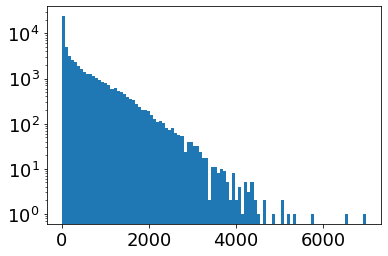

In [48]:
import matplotlib.pyplot as plt
_ = plt.hist(axon_lengths,bins=100)
plt.yscale("log")

# Pull Down and Calculating the Initial Graph

In [17]:
table_to_subtract = (du.proofreading_synapse_table() & "skeletal_distance_to_soma<0 AND synapse_type='presyn'").proj()
synapse_data = (du.proofreading_synapse_table() - table_to_subtract).fetch(as_dict=True)
synapse_data_df = pd.DataFrame.from_dict(synapse_data)
synapse_data_df

,synapse_id,synapse_type,ver,segment_id,split_index,nucleus_id,skeletal_distance_to_soma
0,515874,postsyn,30.00,864691136723541757,0,33721,36.95
1,519136,postsyn,30.00,864691136816114148,0,26870,39.08
2,519451,postsyn,30.00,864691135393987573,0,64263,76.29
3,520250,postsyn,30.00,864691136816114148,0,26870,25.21
4,526715,postsyn,30.00,864691136056321496,0,36422,64.44
...,...,...,...,...,...,...,...
15032555,513427117,postsyn,30.00,864691135354964943,0,406932,71.85
15032556,513427123,postsyn,30.00,864691136099763829,0,407040,55.05
15032557,513428356,postsyn,30.00,864691136784133998,0,178345,49.67
15032558,513428538,postsyn,30.00,864691136784133998,0,178345,53.48


In [18]:
uniq_synapse_ids,unique_synapse_indexes,inverse_indices,synapse_id_counts = np.unique(synapse_data_df["synapse_id"].to_numpy(),
                           return_index=True,
                           return_inverse=True,
                            return_counts=True)

In [19]:
direct_connection_synapse_idx = np.where(synapse_id_counts==2)[0]
direct_connection_synapse_mask = np.zeros(len(synapse_id_counts))
direct_connection_synapse_mask[direct_connection_synapse_idx] = 1
direct_connection_synapse_mask = direct_connection_synapse_mask.astype("bool")
row_filter = direct_connection_synapse_mask[inverse_indices]

direct_connections_df = synapse_data_df.iloc[row_filter]
direct_connections_df

,synapse_id,synapse_type,ver,segment_id,split_index,nucleus_id,skeletal_distance_to_soma
63,903966,presyn,30.00,864691135939649958,0,29831,1.56
64,903966,postsyn,30.00,864691135122295079,0,29845,-1.00
65,904217,presyn,30.00,864691135939649958,0,29831,6.57
66,904217,postsyn,30.00,864691135850416327,0,36402,153.81
88,924092,presyn,30.00,864691135939649958,0,29831,0.00
...,...,...,...,...,...,...,...
15032484,513413572,postsyn,30.00,864691135307098950,0,238070,37.96
15032517,513418968,presyn,30.00,864691135926301908,0,674379,31.56
15032518,513418968,postsyn,30.00,864691136051705048,0,674402,20.44
15032525,513419405,presyn,30.00,864691135382459610,0,628456,23.85


In [20]:
# Combining the table's presyns and postsyns onto the same row

df_tables = []
for synapse_type in ["presyn","postsyn"]:
    direct_connections_df_init = direct_connections_df[direct_connections_df["synapse_type"]==synapse_type]
    
    direct_connections_df_init_sorted = direct_connections_df_init.sort_values(by=['synapse_id']).reset_index(drop=True)
    
    direct_connections_df_presyn = direct_connections_df_init_sorted[[k for k in direct_connections_df_init_sorted.columns if k != "synapse_type"] ]
    
    #column_mapper = dict([(k,f"{k}_{synapse_type}") if k != "synapse_id"  else (k,k) for k in direct_connections_df_presyn.columns])
    column_mapper = dict([(k,f"{synapse_type}_{k}") for k in direct_connections_df_presyn.columns])

    presyn_df = direct_connections_df_presyn.rename(columns=column_mapper)
    df_tables.append(presyn_df)
    
direct_conn_df = pd.concat(df_tables,axis=1)
direct_conn_df

,presyn_synapse_id,presyn_ver,presyn_segment_id,presyn_split_index,presyn_nucleus_id,presyn_skeletal_distance_to_soma,postsyn_synapse_id,postsyn_ver,postsyn_segment_id,postsyn_split_index,postsyn_nucleus_id,postsyn_skeletal_distance_to_soma
0,903966,30.00,864691135939649958,0,29831,1.56,903966,30.00,864691135122295079,0,29845,-1.00
1,904217,30.00,864691135939649958,0,29831,6.57,904217,30.00,864691135850416327,0,36402,153.81
2,924092,30.00,864691135939649958,0,29831,0.00,924092,30.00,864691135122295079,0,29845,-1.00
3,974603,30.00,864691135644599023,0,30448,5.13,974603,30.00,864691135303187623,0,30449,-1.00
4,1126224,30.00,864691135939649958,0,29831,14.75,1126224,30.00,864691135122295079,0,29845,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...
1465915,513373963,30.00,864691135373797449,0,499628,227.23,513373963,30.00,864691136236752143,0,562765,21.31
1465916,513387865,30.00,864691136143419188,0,376188,92.01,513387865,30.00,864691135994557098,0,407862,34.06
1465917,513413572,30.00,864691135777099709,0,240276,30.57,513413572,30.00,864691135307098950,0,238070,37.96
1465918,513418968,30.00,864691135926301908,0,674379,31.56,513418968,30.00,864691136051705048,0,674402,20.44


In [21]:
edges_df = direct_conn_df[["presyn_nucleus_id","postsyn_nucleus_id"]]
connectome_edges = edges_df.to_numpy()
connectome_edges

array([[ 29831,  29845],
       [ 29831,  36402],
       [ 29831,  29845],
       ...,
       [240276, 238070],
       [674379, 674402],
       [628456, 625856]])

# Preliminary Look at the Graph

In [22]:
import networkx as nx

In [23]:
G = nx.MultiDiGraph()
G.add_edges_from(connectome_edges)
len(G.nodes()),len(G.edges())

(69565, 1465920)

In [24]:
G_undirected_non_multi = nx.Graph(G)
len(G_undirected_non_multi.nodes()),len(G_undirected_non_multi.edges())

(69565, 1092877)

In [25]:
G_directed_non_multi = nx.DiGraph(G)
len(G_directed_non_multi.nodes()),len(G_directed_non_multi.edges())

(69565, 1105868)

In [26]:
#For connected components cannot be a directed graph
G_undirected = G_undirected_non_multi

n_components = nx.number_connected_components(G_undirected)
print(f"Number of connected components = {n_components}")

# The Sizes of the components in the graph
conn_comp = list(nx.connected_components(G_undirected))
conn_comp_size = [len(k) for k in conn_comp]
print(f"conn_comp_size = {conn_comp_size}")

Number of connected components = 124
conn_comp_size = [69301, 4, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2]


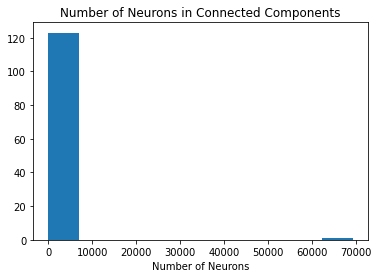

In [27]:
fig,ax = plt.subplots(1,1)
ax.hist(conn_comp_size)
ax.set_title("Number of Neurons in Connected Components")
ax.set_xlabel("Number of Neurons")
plt.show()

# Selecting the largest component

In [28]:
G_largest = G.subgraph(conn_comp[0])
node_names_largest_comp = np.array(G_largest.nodes())
node_names_largest_comp.shape

(69301,)

# Plotting the Degree Distribution

In [29]:
import graph_visualizations as gu

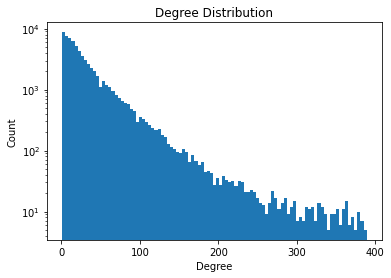

In [30]:
gu.plot_degree_distribution(G,logscale=True,n_bins = 100,percentile=99,
                           font_size=20)

# Getting the statistics on the graph

In [31]:
large_axon_nuclei = (du.proofreading_neurons_table() & "axon_length>1000").fetch("nucleus_id")
large_axon_nuclei.shape
large_axon_subgraph = G.subgraph(large_axon_nuclei)


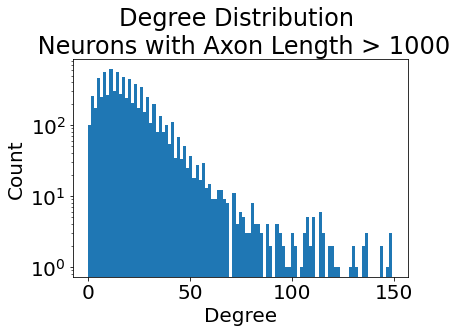

In [32]:
gu.plot_degree_distribution(large_axon_subgraph,logscale=True,n_bins = 100,percentile=99,
                           font_size=18,
                           title="Degree Distribution \n Neurons with Axon Length > 1000")

In [33]:
print(f"""
Graph Statistics:

Within the Direction Connection Graph
1) {len(G.nodes())} Nodes
2) {len(G.edges())} Direct Connections
3) {len(large_axon_subgraph.nodes())} Nodes with Axon Skeletal Length > 1000
4) {len(large_axon_subgraph.edges())} Direct Connections between Nodes with Axon Skeletal Length > 1000

""")


Graph Statistics:

Within the Direction Connection Graph
1) 69565 Nodes
2) 1465920 Direct Connections
3) 8000 Nodes with Axon Skeletal Length > 1000
4) 93202 Direct Connections between Nodes with Axon Skeletal Length > 1000




In [36]:
excitatory_nuclei = (du.proofreading_neurons_table() & dict(spine_category = "densely_spined")).fetch("nucleus_id")
excitatory_nuclei
G_exc = G.subgraph(excitatory_nuclei)
large_axon_nuclei_exc =  (du.proofreading_neurons_table() & dict(spine_category = "densely_spined")
                                             & "axon_length>1000").fetch("nucleus_id")
large_axon_subgraph_exc = G.subgraph(large_axon_nuclei_exc)
                              

In [49]:
minnie.AutoProofreadNeurons3()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,0,3,1,inhibitory,no_spined,0,0,0.0,0.0,73352,506.05,1,1,84299,173386,16102,11139,248,11723,24809,0,0,0,0,1,0,0,Non

In [50]:
(du.m65mat.ProofreadFunctionalCoregV2 & 'ver=30').fetch('nucleus_id')

[autoreload of six failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 287, in update_class
    old_obj = getattr(old, key)
  File "/usr/local/lib/python3.6/dist-packages/six.py", line 93, in __get__
    setattr(obj, self.name, result)  # Invokes __set__.
AttributeError: 'NoneType' object has no attribute 'cStringIO'
]
INFO - 2021-03-04 17:54:24,539 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-04 17:54:24,540 - settings - Setting database.user to celiib
INFO - 2021-03-0

[autoreload of cryptography.utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 139, in reload
    raise TypeError("reload() argument must be a module")
TypeError: reload() argument must be a module
]
[autoreload of networkx.classes.graph failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/us

[autoreload of pandas.compat failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/pandas/compat/__init__.py", line 15, in <module>
    from pandas._typing import F
ImportError: cannot import name 'F'
]
[autoreload of pandas._libs.tslibs failed: Traceback (most recent call

[autoreload of pandas.core.util.hashing failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/pandas/core/util/hashing.py", line 9, in <module>
    import pandas._libs.hashing as hashing
AttributeError: module 'pandas._libs' has no attribute 'hashing'
]
[autoreload of pand

[autoreload of pandas.core.arrays.integer failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: __init__() requires a code object with 0 free v

[autoreload of pandas.core.series failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/pandas/core/series.py", line 37, in <module>
    from pandas.errors import InvalidIndexError
ImportError: cannot import name 'InvalidIndexError'
]
[autoreload of pandas.core.indexes.acc

[autoreload of pandas.compat.chainmap failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/local/lib/python3.6/dist-packages/IPython/exte

[autoreload of pandas.io.excel._xlsxwriter failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/excel/_xlsxwriter.py", line 1, in <module>
    import pandas._libs.json as json
AttributeError: module 'pandas._libs' has no attribute 'json'
]
[autoreload of pandas.

[autoreload of pandas._testing failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/pandas/_testing.py", line 26, in <module>
    import pandas._libs.testing as _testing
AttributeError: module 'pandas._libs' has no attribute 'testing'
]
[autoreload of pyparsing failed: Tr

[autoreload of h5py._hl.files failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: __init__() requires a code object with 0 free vars, not 1
]

[autoreload of imageio.plugins.grab failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/imageio/plugins/grab.py", line 118, in <module>
    formats.add_format(format)
  File "/usr/local/lib/python3.6/dist-packages/imageio/core/format.py", line 655, in add_format
    rais

[autoreload of pyvista.core.common failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/pyvista/core/common.py", line 14, in <module>
    from pyvista.utilities import (FieldAssociation, get_array, is_pyvista_dataset,
ImportError: cannot import name 'axis_rotation'
]
[aut

[autoreload of pkg_resources.extern failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 276, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]
[autoreload of pkg_resources._vendor.appdirs failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superre

[autoreload of trimesh.exchange.stl failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 276, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]
[autoreload of trimesh.scene.cameras failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, 

[autoreload of trimesh.path.path failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 276, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]
[autoreload of PIL.ImageDraw failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, sel

[autoreload of shapely.geometry.multipolygon failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 276, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]
[autoreload of shapely.geometry.collection failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    

[autoreload of scipy.stats._multivariate failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/scipy/stats/_multivariate.py", line 690, in <module>
    multivariate_normal = multivariate_normal_gen()
  File "/usr/local/lib/python3.6/dist-packages/scipy/stats/_multivariate.

[autoreload of sklearn.preprocessing._data failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 323, in update_property
    update_generic(old.fget, new.fget)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensi

[autoreload of sklearn.neighbors._regression failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 323, in update_property
    update_generic(old.fget, new.fget)
  File "/usr/local/lib/python3.6/dist-packages/IPython/exten

[autoreload of sklearn.linear_model._stochastic_gradient failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 23, in <module>
    from ..utils.fixes import delayed
ImportError: cannot import name 'delayed'
]
[autoreload 

[autoreload of sklearn.decomposition._lda failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_lda.py", line 15, in <module>
    import scipy.sparse as sp
AttributeError: module 'scipy' has no attribute 'sparse'
]
[autoreload of chardet.sbcsgrouppro

[autoreload of google.auth.transport.requests failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/google/auth/transport/requests.py", line 78, in <module>
    class TimeoutGuard(object):
  File "/usr/local/lib/python3.6/dist-packages/google/auth/transport/requests.py", l

[autoreload of cachetools.cache failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
TypeError: __class__ assignment: '_DefaultSize' deallocator differs from '_DefaultSize'
]
[autoreload of tenacity.retry failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/auto

[autoreload of jsonschema._types failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    ref.__class__ = new
  File "/usr/local/lib/python3.6/dist-packages/attr/_make.py", line 553, in _frozen_setattrs
    raise FrozenInstanceError()
attr.exceptions.FrozenInstanceError
]
[autoreload of pyrsistent._pmap failed: Traceback (most recent call l

[autoreload of cloudvolume.datasource.precomputed.image.tx failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/cloudvolume/datasource/precomputed/image/tx.py", line 20, in <module>
    import cloudvolume.sharedmemory as shm
AttributeError: module 'cloudvolume' has no att

array([225498, 230236, 236197, 258307, 262773, 264870, 269247, 269380,
       271518, 294545, 294545, 296726, 300763, 301095, 301189, 327859,
       330079, 330326, 331945, 332199, 335175, 460053, 460391, 487512,
       489675, 493419, 493569, 493806, 493885, 493968, 516621, 516621,
       516621, 516758, 517056, 518224, 518224, 518224, 518623, 518623,
       518623, 518848, 518853, 518898, 520027, 520364, 522656, 524491,
       525405, 525498, 525758, 526226, 553283, 553283, 553321, 553325,
       553407, 554200, 554741, 554833, 554891, 554891, 554921, 556823,
       556823, 557030, 557121, 558684, 558709, 559081, 559381, 559381,
       560109, 560109, 560217, 560530, 560732, 562808, 564808, 580826,
       580826, 580948, 580948, 580948, 580988, 580988, 580988, 580988,
       581967, 582056, 582056, 582129, 582129, 582129, 582210, 583848,
       583891, 583961, 585723, 585723, 587426, 587426, 588839, 588983,
       612143, 612143, 612266, 612352, 616159])

In [37]:
print(f"""
Graph Statistics:

* For an all densely spined excitatory graph *
Within the Direct Connection Graph
1) {len(G_exc.nodes())} Nodes
2) {len(G_exc.edges())} Direct Connections
3) {len(large_axon_subgraph_exc.nodes())} Nodes with Axon Skeletal Length > 1000
4) {len(large_axon_subgraph_exc.edges())} Direct Connections between Nodes with Axon Skeletal Length > 1000

""")


Graph Statistics:

* For an all densely spined excitatory graph *
Within the Direct Connection Graph
1) 53451 Nodes
2) 361500 Direct Connections
3) 7411 Nodes with Axon Skeletal Length > 1000
4) 58372 Direct Connections between Nodes with Axon Skeletal Length > 1000




In [ ]:
"""
Steps for Decomposition:

Preprocessing:
1) Auto Glia and Nuclei Removal

Decomposition:
1) Find Soma
2) Divide into Soma and Branches
3) Skeletonize All Branches
4) Create Concept Graphs of all Limbs
5) Automatic Spine Detection, Width calculation

Proofreading:
6) Split Multi-Nuclei Cells
7) Axon and Apical Identification
8) Excitatory/Inhibitory Classification
9) E/I based mesh filtering away
10) Synapse Filtering based on mesh filtering away




"""

# Degree Distribution

In [ ]:
undirectional_graph = nx.Graph(G_largest)
no_selflooped_graph = xu.remove_selfloops(undirectional_graph)
no_selflooped_graph

In [ ]:
degree_distribution = np.array(xu.get_node_degree(no_selflooped_graph,node_names_largest_comp))
degree_distribution_filtered = degree_distribution[degree_distribution<np.percentile(degree_distribution,99.5)]

In [ ]:
print(f"Average Degree of Node: {np.mean(degree_distribution_filtered)}")
print(f"Median Degree of Node: {np.median(degree_distribution_filtered)}")

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(degree_distribution_filtered,bins=50,density=True)
ax.set_title("Degree Distribution of Neurons \n Unique Edges, No Self Loops")
ax.set_xlabel("Degree of Neuron")
ax.set_ylabel("Density")
plt.show()

# Degree Distribution In and Out

In [ ]:
np.sum(degree_distribution(G,degree_type="in")),np.sum(degree_distribution(G,degree_type="out"))

In [ ]:
np.sum(degree_distribution(G,degree_type="in_and_out"))

In [ ]:
import graph_analysis as ga
import graph_visualizations as gviz

In [ ]:
from importlib import reload
gviz = reload(gviz)

In [ ]:
in_degree = np.array(list(dict(G.in_degree()).values()))
in_degree

In [ ]:
import matplotlib.pyplot as plt
import matplotlib_utils as mu

import numpy as np

mu.histogram(in_degree,bin_max = 700,
         bin_width = 10,return_fig_ax=True,logscale=True)

In [ ]:
ga.degree_distribution(G,
                                                       degree_type="in",
                                                       percentile=95)

In [ ]:
gviz.plot_degree_distribution(G,degree_type="in",
                             percentile=100,
                              bin_width = 10,
                              bin_max = 600,
                             )

In [ ]:
gviz.plot_degree_distribution(G,degree_type="out",
                             percentile=100,
                              bin_width = 10,
                              bin_max = 600,
                             )

In [ ]:
gviz.plot_degree_distribution(G,degree_type="in",
                         bin_width=5,
                         bin_max = 800,
                        percentile=99)

In [ ]:
gviz.plot_degree_distribution(G,degree_type="out",
                         bin_width=5,
                         bin_max = 800,
                        percentile=99)

In [ ]:
gviz.plot_degree_distribution(G,degree_type="in",title="In-Degree Distribution",
                         bin_width=5,
                         bin_max = 500,
                        percentile=99)

In [ ]:
plot_degree_distribution(G,degree_type="out",title="Out-Degree Distribution",
                        percentile=99)

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(degree_distribution_filtered,bins=50,density=False)
ax.set_title("Degree Distribution of Neurons \n Unique Edges, No Self Loops")
ax.set_xlabel("Degree of Neuron")
ax.set_ylabel("Count")
ax.set_yscale("log")
plt.show()

# Getting the Soma to Soma Distance

In [ ]:
"""
Psuedoode: Pull down the Nucleus IDs and Nucleus Centers

1) Get the nucleus ids and centers
2) Adjust the centers for nm


"""

nuc_table = du.configure_nucleus_table() & "segment_id>0"
nuc_table

In [ ]:
nucleu_ids,nuc_x,nuc_y,nuc_z = nuc_table.fetch("nucleus_id","nucleus_x","nucleus_y","nucleus_z")

In [ ]:
nucleus_centers = np.vstack([nuc_x,nuc_y,nuc_z]).T * [4,4,40]
nucleus_centers

In [ ]:
nuc_id_to_center = dict([(k,v) for k,v in zip(nucleu_ids,nucleus_centers)])

In [ ]:
len(G_undirected_non_multi.edges())

In [ ]:
print("hi")

In [ ]:
import matplotlib.pyplot as plt
def graph_to_soma_to_soma_distance(G):
    total_unique_edges = np.array(list(G.edges()))
    edges_mask = np.all(total_unique_edges>0,axis=1)
    soma_distances = np.array([[nuc_id_to_center[k],nuc_id_to_center[v]] for k,v in total_unique_edges[edges_mask]])
    soma_distances_norm = np.linalg.norm(soma_distances[:,0,:] - soma_distances[:,1,:],axis=1)

    
    fig,ax = plt.subplots(1,1)
    ax.hist(soma_distances_norm/1000,bins=100,density=False)
    ax.set_title("Soma to Soma Distance of Unique Direct Connections \n After Auto Proofreading")
    ax.set_xlabel("Soma to Soma Distance (um)")
    ax.set_ylabel("Counts")
    plt.yscale("log")
    plt.xscale("linear")
    plt.show()

graph_to_soma_to_soma_distance(G)

In [ ]:
graph_to_soma_to_soma_distance(G_undirected_non_multi)

In [ ]:
total_unique_edges = np.array(list(G_undirected_non_multi.edges()))


In [ ]:
edges_mask = np.all(total_unique_edges>0,axis=1)
edges_mask

In [ ]:
soma_distances = np.array([[nuc_id_to_center[k],nuc_id_to_center[v]] for k,v in total_unique_edges[edges_mask]])
soma_distances

In [ ]:
soma_distances.shape

In [ ]:
soma_distances_norm = np.linalg.norm(soma_distances[:,0,:] - soma_distances[:,1,:],axis=1)
soma_distances_norm.shape

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(soma_distances_norm/1000,bins=100,density=False)
ax.set_title("Soma to Soma Distance of Unique Direct Connections \n After Auto Proofreading")
ax.set_xlabel("Soma to Soma Distance (um)")
ax.set_ylabel("Counts")
plt.yscale("log")
plt.xscale("linear")
plt.show()

In [ ]:
alpha_level = 0.7

import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(total_distances_no_self_loops/1000,bins=100,density=False,color="blue",label="Before Auto Proofreading",alpha=alpha_level)
ax.hist(total_distances_no_self_loops_auto/1000,bins=100,density=False,color="red",label="After Auto Proofreading",alpha=alpha_level)
ax.set_title("Soma to Soma Distance of Direct Connections")
ax.set_xlabel("Soma to Soma Distance (um)")
ax.set_ylabel("Counts")

ax.set_yscale("log")
ax.set_xscale("linear")
ax.legend()
plt.show()